<a href="https://colab.research.google.com/github/tashfi04/swe-427-ML-assignments/blob/main/Gradient_Descent(2017831011).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import io

In [ ]:
!gdown 17JR0o1VgX-c5uNDThwpOUOAbd99_kNFY

Downloading...
From: https://drive.google.com/uc?id=17JR0o1VgX-c5uNDThwpOUOAbd99_kNFY
To: /content/4K_House_Rent_Dataset.csv
100% 567k/567k [00:00<00:00, 107MB/s]


In [ ]:
data = pd.read_csv("4K_House_Rent_Dataset.csv")
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
y = data['Rent'].values
x1 = data['Size'].values
x2 = data['BHK'].values
x3 = data['Area Type'].values
x4 = data['Bathroom'].values
x5 = data['Furnishing Status'].values

In [ ]:
def replace_feature_by_value(feature_list, feature, value):
  return [value if item == feature else item for item in feature_list]

In [ ]:
print(set(data['Furnishing Status']))
print(set(data['Area Type']))

{'Unfurnished', 'Semi-Furnished', 'Furnished'}
{'Carpet Area', 'Super Area', 'Built Area'}


In [ ]:
x3 = replace_feature_by_value(x3,'Super Area', 1)
x3 = replace_feature_by_value(x3,'Built Area', 2)
x3 = replace_feature_by_value(x3,'Carpet Area', 3)

x5 = replace_feature_by_value(x5,'Unfurnished', 1)
x5 = replace_feature_by_value(x5,'Semi-Furnished', 2)
x5 = replace_feature_by_value(x5,'Furnished', 3)

In [ ]:
theta_0 = 0
theta_1 = 0
theta_2 = 0
theta_3 = 0
theta_4 = 0
theta_5 = 0

m = len(x1)

epoch = 1000
learning_rate = 0.0000001

for i in range(epoch):

    temp_0 = 0
    temp_1 = 0
    temp_2 = 0
    temp_3 = 0
    temp_4 = 0
    temp_5 = 0

    for j in range(m):
      
        temp_0 += (theta_0 + theta_1*x1[j] + theta_2*x2[j] + theta_3*x3[j] + theta_4*x4[j] + theta_5*x5[j] - y[j])
        temp_1 += (theta_0 + theta_1*x1[j] + theta_2*x2[j] + theta_3*x3[j] + theta_4*x4[j] + theta_5*x5[j] - y[j]) * x1[j]
        temp_2 += (theta_0 + theta_1*x1[j] + theta_2*x2[j] + theta_3*x3[j] + theta_4*x4[j] + theta_5*x5[j] - y[j]) * x2[j]
        temp_3 += (theta_0 + theta_1*x1[j] + theta_2*x2[j] + theta_3*x3[j] + theta_4*x4[j] + theta_5*x5[j] - y[j]) * x3[j]
        temp_4 += (theta_0 + theta_1*x1[j] + theta_2*x2[j] + theta_3*x3[j] + theta_4*x4[j] + theta_5*x5[j] - y[j]) * x4[j]
        temp_5 += (theta_0 + theta_1*x1[j] + theta_2*x2[j] + theta_3*x3[j] + theta_4*x4[j] + theta_5*x5[j] - y[j]) * x5[j]
  
    theta_0 = theta_0 - (learning_rate * temp_0 / m)
    theta_1 = theta_1 - (learning_rate * temp_1 / m)
    theta_2 = theta_2 - (learning_rate * temp_2 / m)
    theta_3 = theta_3 - (learning_rate * temp_3 / m)
    theta_4 = theta_4 - (learning_rate * temp_4 / m)
    theta_5 = theta_5 - (learning_rate * temp_5 / m)


sum = 0
for i in range(m):
    
    temp_sum = theta_0 + theta_1*x1[i] + theta_2*x2[i] + theta_3*x3[i] + theta_4*x4[i] + theta_5*x5[i] - y[i]
    temp_sum = temp_sum ** 2
    sum += temp_sum

cost = sum / (2 * m)

print('theta_0: ', theta_0, 'theta_1: ', theta_1, 'theta_2: ', theta_2, 'theta_3: ', theta_3, 'theta_4: ', theta_4, 'theta_5: ', theta_5)
print('cost: ', cost)

theta_0:  -0.3998630507992406 theta_1:  40.60396003168561 theta_2:  0.04650098548491513 theta_3:  0.6908865386109139 theta_4:  0.5872843373408848 theta_5:  -0.22453689888160358
cost:  2558737032.0421195


In [ ]:
def plot(X, Y, label_x, label_y, theta, theta0):

    line_x = np.linspace(np.min(X), np.max(X), 1000)
    reg_line = theta * line_x + theta0

    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)

    plt.plot(line_x, reg_line, c ='#58b970', label='Regression Line')
    plt.scatter(X, Y, c = "#ef5423", label = 'Scatter plot')

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend()
    plt.show()

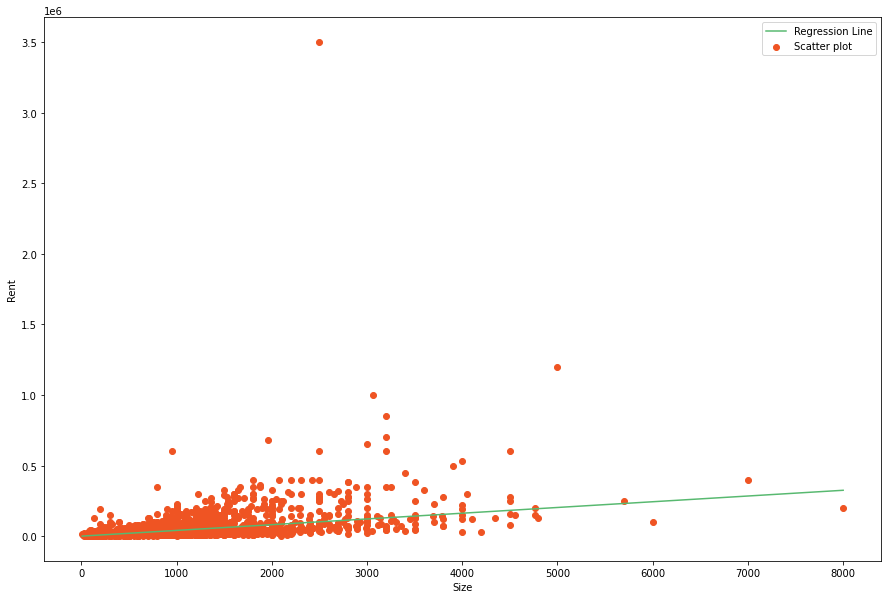

In [ ]:
plot(x1, y, "Size", "Rent", theta_1, theta_0)

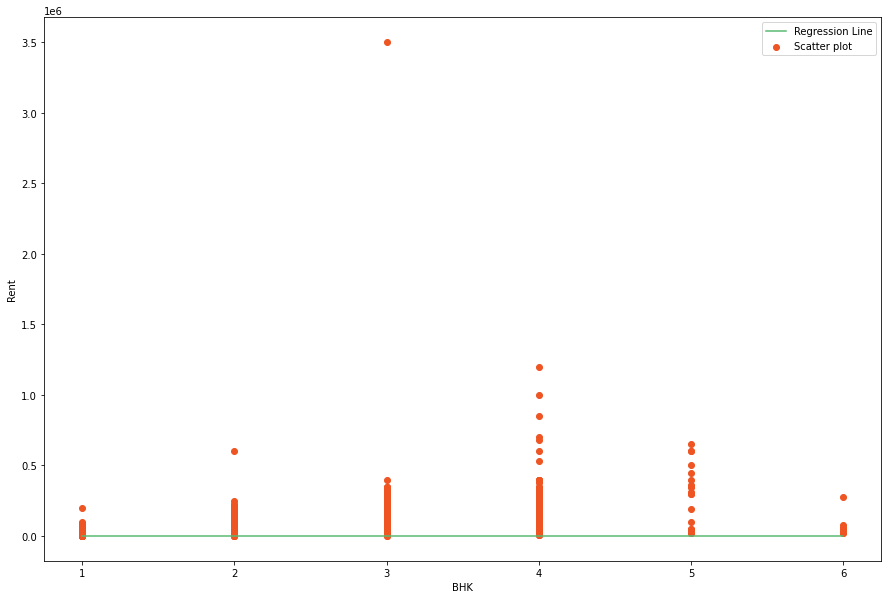

In [ ]:
plot(x2, y, "BHK", "Rent", theta_2, theta_0)

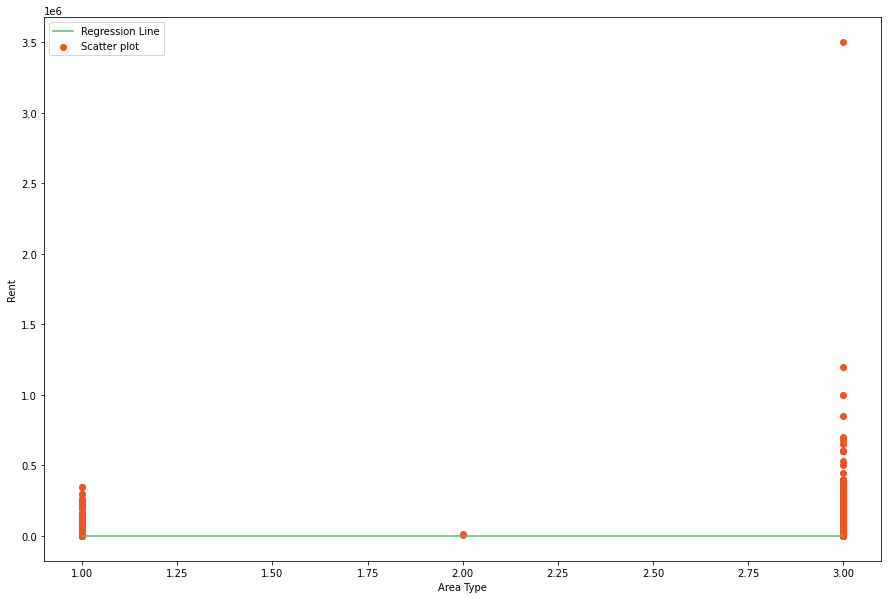

In [ ]:
plot(x3, y, "Area Type", "Rent", theta_3, theta_0)

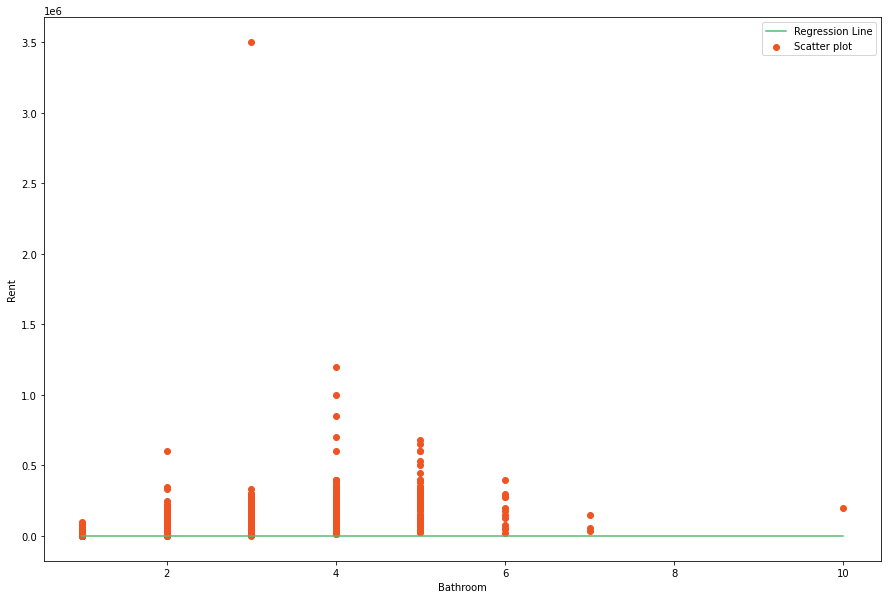

In [ ]:
plot(x4, y, "Bathroom", "Rent", theta_4, theta_0)

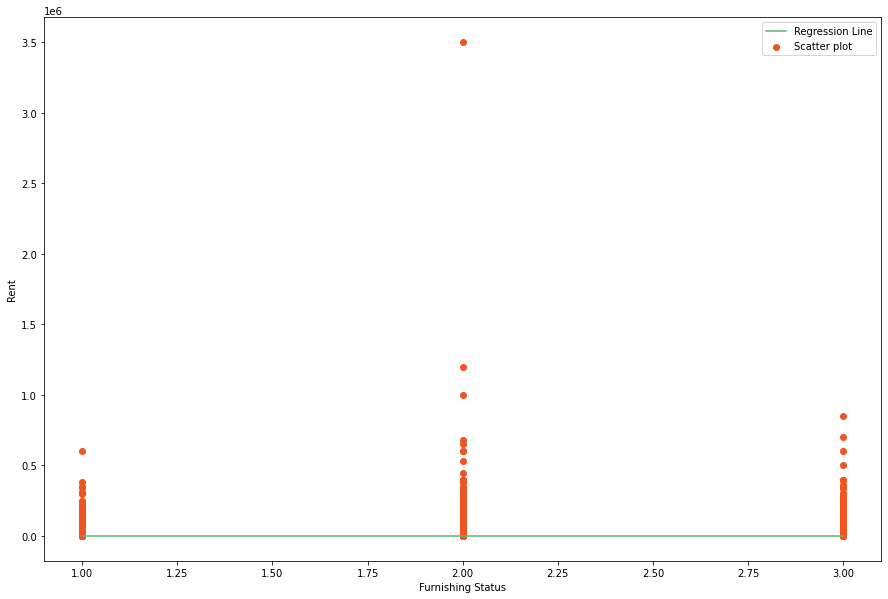

In [ ]:
plot(x5, y, "Furnishing Status", "Rent", theta_5, theta_0)